In [1]:
import h5py

# HDF5 파일 열기
file_path = 'image_dataset.hdf5'
with h5py.File(file_path, 'r') as f:
    # 최상위 그룹의 이름을 확인
    print("Root groups:")
    for name in f:
        print(name)
    
    # 파일의 모든 그룹과 하위 그룹을 재귀적으로 출력하는 함수
    def print_group_structure(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Group: {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name} | Shape: {obj.shape} | Type: {obj.dtype}")
    
    # 전체 파일의 구조 탐색
    f.visititems(print_group_structure)


Root groups:
train 2ch frames
train 2ch masks
train 4ch frames
train 4ch masks
Dataset: train 2ch frames | Shape: (900, 384, 384, 1) | Type: float32
Dataset: train 2ch masks | Shape: (900, 384, 384, 1) | Type: int32
Dataset: train 4ch frames | Shape: (900, 384, 384, 1) | Type: float32
Dataset: train 4ch masks | Shape: (900, 384, 384, 1) | Type: int32


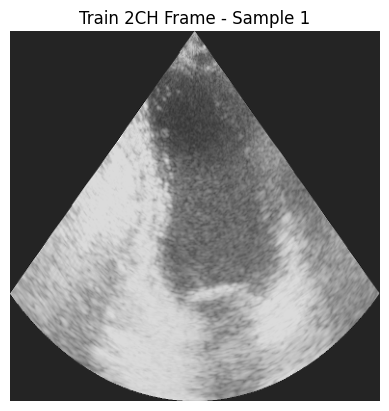

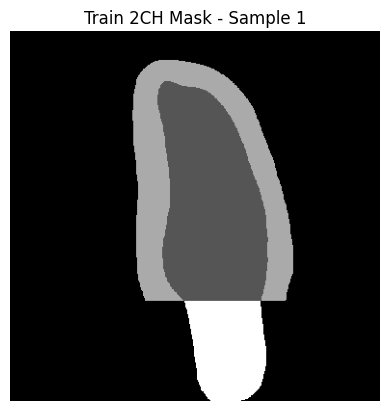

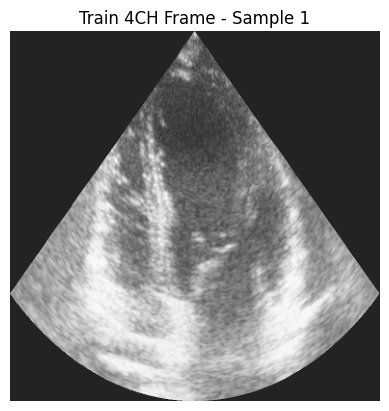

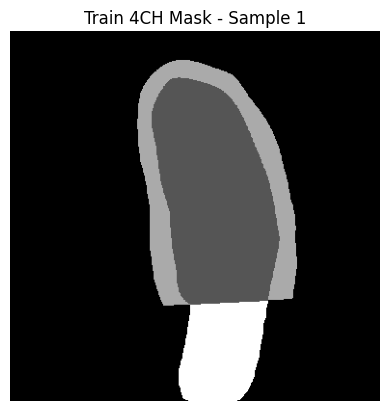


Train 2CH Frames Statistics:
Shape: (900, 384, 384, 1)
Data Type: float32
Min: -0.2079576998949051
Max: 1.2046726942062378
Mean: 0.19132976233959198
Standard Deviation: 0.22448484599590302

Train 2CH Masks Statistics:
Shape: (900, 384, 384, 1)
Data Type: int32
Min: 0
Max: 3
Mean: 0.4588892581139082
Standard Deviation: 0.8727611998730325

Train 4CH Frames Statistics:
Shape: (900, 384, 384, 1)
Data Type: float32
Min: -0.20934544503688812
Max: 1.2083498239517212
Mean: 0.19366735219955444
Standard Deviation: 0.22534163296222687

Train 4CH Masks Statistics:
Shape: (900, 384, 384, 1)
Data Type: int32
Min: 0
Max: 3
Mean: 0.4234165596667631
Standard Deviation: 0.8542724341320136


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


# HDF5 파일 열기
with h5py.File(file_path, 'r') as f:
    # 각 데이터셋 가져오기
    train_2ch_frames = f['train 2ch frames'][:]
    train_2ch_masks = f['train 2ch masks'][:]
    train_4ch_frames = f['train 4ch frames'][:]
    train_4ch_masks = f['train 4ch masks'][:]
    
    # 데이터셋의 샘플 보기 (예: 첫 번째 이미지)
    def show_sample(data, title):
        plt.imshow(data[:, :, 0], cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    
    # 첫 번째 샘플 이미지와 마스크 시각화
    show_sample(train_2ch_frames[0], 'Train 2CH Frame - Sample 1')
    show_sample(train_2ch_masks[0], 'Train 2CH Mask - Sample 1')
    show_sample(train_4ch_frames[0], 'Train 4CH Frame - Sample 1')
    show_sample(train_4ch_masks[0], 'Train 4CH Mask - Sample 1')
    
    # 추가 분석을 위해 데이터셋의 기본 통계 정보 출력
    def print_dataset_stats(name, data):
        print(f"\n{name} Statistics:")
        print(f"Shape: {data.shape}")
        print(f"Data Type: {data.dtype}")
        print(f"Min: {np.min(data)}")
        print(f"Max: {np.max(data)}")
        print(f"Mean: {np.mean(data)}")
        print(f"Standard Deviation: {np.std(data)}")
    
    print_dataset_stats('Train 2CH Frames', train_2ch_frames)
    print_dataset_stats('Train 2CH Masks', train_2ch_masks)
    print_dataset_stats('Train 4CH Frames', train_4ch_frames)
    print_dataset_stats('Train 4CH Masks', train_4ch_masks)


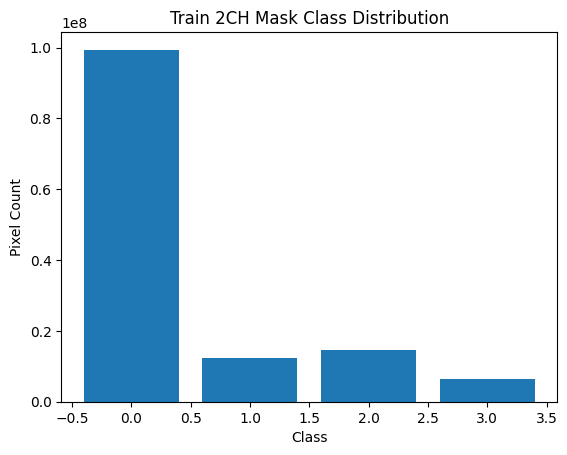

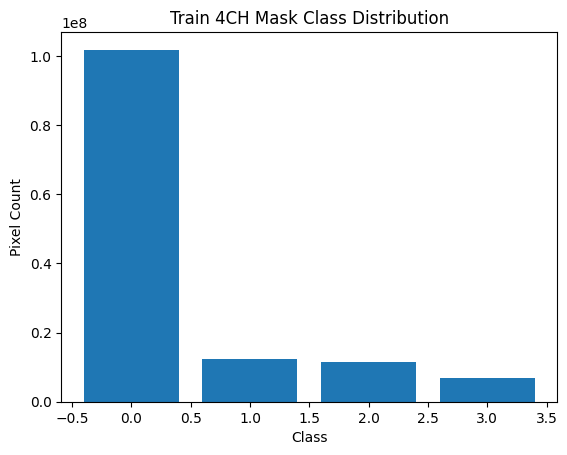

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# HDF5 파일 경로
file_path = '/Users/guno/github/CAMUS/image_dataset.hdf5'

# HDF5 파일 열기
with h5py.File(file_path, 'r') as f:
    # 마스크 데이터셋 로드
    train_2ch_masks = f['train 2ch masks'][:]
    train_4ch_masks = f['train 4ch masks'][:]

    # 클래스별 픽셀 수 계산
    def calculate_class_distribution(masks):
        unique, counts = np.unique(masks, return_counts=True)
        class_distribution = dict(zip(unique, counts))
        return class_distribution

    # 2CH 마스크의 클래스 분포 계산
    train_2ch_distribution = calculate_class_distribution(train_2ch_masks)
    train_4ch_distribution = calculate_class_distribution(train_4ch_masks)

    # 클래스 분포 시각화
    def plot_class_distribution(distribution, title):
        plt.bar(distribution.keys(), distribution.values())
        plt.title(title)
        plt.xlabel('Class')
        plt.ylabel('Pixel Count')
        plt.show()

    plot_class_distribution(train_2ch_distribution, 'Train 2CH Mask Class Distribution')
    plot_class_distribution(train_4ch_distribution, 'Train 4CH Mask Class Distribution')


In [2]:
import nibabel as nib

# .nii 파일 로드
file_path = 'patient0001_2CH_ED_gt.nii'  # 실제 파일 경로로 변경
img = nib.load(file_path)

# 이미지 데이터와 헤더 정보 가져오기
data = img.get_fdata()
header = img.header

# 데이터 및 헤더 정보 출력
print("Data shape:", data.shape)
print("Header information:", header)


Data shape: (549, 389)
Header information: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  2 549 389   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    0.308 0.308 1.    0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.

Data shape: (549, 389, 18)


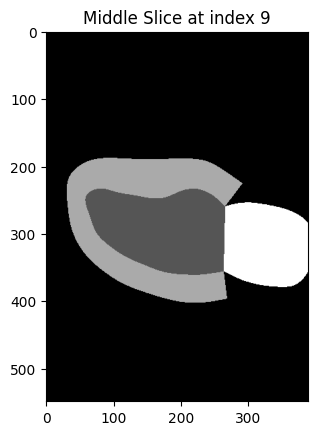

In [7]:
import nibabel as nib
import matplotlib.pyplot as plt

# .nii 파일 로드
file_path = 'patient0001_2CH_half_sequence_gt.nii'  # 실제 파일 경로로 변경
img = nib.load(file_path)

# 이미지 데이터와 헤더 정보 가져오기
data = img.get_fdata()

# 데이터 차원 확인
print("Data shape:", data.shape)

# 단일 슬라이스 시각화 (2D 이미지일 경우, 전체 데이터 시각화)
if data.ndim == 2:
    plt.imshow(data, cmap="gray")
    plt.title("2D NII Image")
    plt.show()
elif data.ndim == 3:
    # 3D 데이터의 가운데 슬라이스 시각화
    slice_idx = data.shape[2] // 2
    plt.imshow(data[:, :, slice_idx], cmap="gray")
    plt.title(f"Middle Slice at index {slice_idx}")
    plt.show()


Data shape: (591, 487)


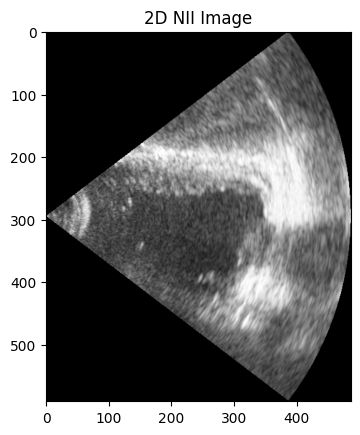

In [8]:
import nibabel as nib
import matplotlib.pyplot as plt

# .nii 파일 로드
file_path = 'patient0003_2CH_ED.nii'  # 실제 파일 경로로 변경
img = nib.load(file_path)

# 이미지 데이터와 헤더 정보 가져오기
data = img.get_fdata()

# 데이터 차원 확인
print("Data shape:", data.shape)

# 단일 슬라이스 시각화 (2D 이미지일 경우, 전체 데이터 시각화)
if data.ndim == 2:
    plt.imshow(data, cmap="gray")
    plt.title("2D NII Image")
    plt.show()
elif data.ndim == 3:
    # 3D 데이터의 가운데 슬라이스 시각화
    slice_idx = data.shape[2] // 2
    plt.imshow(data[:, :, slice_idx], cmap="gray")
    plt.title(f"Middle Slice at index {slice_idx}")
    plt.show()
